In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pickle as pkl

In [111]:
df1 = pd.read_csv('Data_Emission.csv')
df1 = df1.query("Country == 'Indonesia' | Country == 'Argentina' | Country == 'United Kingdom' | Country == 'Brazil' | Country == 'Canada' | Country == 'United States' | Country == 'Italy' | Country == 'France' | Country == 'Germany' | Country == 'South Africa' | Country == 'Japan' | Country == 'Mexico' | Country == 'Saudi Arabia' | Country == 'Turkey' | Country == 'Australia' | Country == 'China' | Country == 'India'")
df1 = df1.drop('Data source', axis=1)
df1 = df1.drop('Sector', axis=1)
df1 = df1.drop('Gas', axis=1)
df1 = df1.drop('Unit', axis=1)

ss = StandardScaler()
warnings.filterwarnings("ignore")

def GenerateMonthlyEmissionData(Dataframe):
  years = 28

  dfm = pd.DataFrame(columns=['Emission Amount'])
  df_old = Dataframe
  i = 0
  j = 0
  k = 0
  counter = 0

  monthIndex = []

  while(years!=0):
    months = 12
    j = i + 1

    start_emission = df_old['Emission Amount'].iloc[i]
    if(i < 27):
      end_emission = df_old['Emission Amount'].iloc[j]
    else:
      monthIndex.append(counter+1)
      dfn = pd.DataFrame(monthIndex, columns = ['Month'])
      dfm['Month'] = dfn['Month']
      result = dfm
      result.set_index('Month')
      return result

    diff = end_emission - start_emission
    divdiff = round(diff / 12,2) # 11 -> months - 1

    dfm.loc[k] = start_emission

    m = 0

    while(months!=0):
      m = m + 1
      k = k + 1

      monthincrement = divdiff * m
      noise = np.random.normal(0, 0.1)
      dfm.loc[k] =  round(start_emission + monthincrement + noise,2)
      months = months - 1
      counter = counter + 1
      monthIndex.append(counter)

    i = i + 1
    years = years - 1


# ---------------------- PREPARING FOR MONTHLY GENERATION -------------------------#

df1_IND = df1.query("Country == 'Indonesia'")

t1_IND = df1_IND.transpose()
t1_IND = t1_IND.reset_index()
t1_IND = t1_IND.drop([0])
t1_IND = t1_IND.rename(columns = {"index":'Year',5:"Emission Amount"})
x_IND = GenerateMonthlyEmissionData(t1_IND)

df1_ARG = df1.query("Country == 'Argentina'")

t1_ARG = df1_ARG.transpose()
t1_ARG = t1_ARG.reset_index()
t1_ARG = t1_ARG.drop([0])
t1_ARG = t1_ARG.rename(columns = {"index":'Year',30:"Emission Amount"})
x_ARG = GenerateMonthlyEmissionData(t1_ARG)

df1_ENG = df1.query("Country == 'United Kingdom'")

t1_ENG = df1_ENG.transpose()
t1_ENG = t1_ENG.reset_index()
t1_ENG = t1_ENG.drop([0])
t1_ENG = t1_ENG.rename(columns = {"index":'Year',19:"Emission Amount"})
x_ENG = GenerateMonthlyEmissionData(t1_ENG)

df1_BRZ = df1.query("Country == 'Brazil'")

t1_BRZ = df1_BRZ.transpose()
t1_BRZ = t1_BRZ.reset_index()
t1_BRZ = t1_BRZ.drop([0])
t1_BRZ = t1_BRZ.rename(columns = {"index":'Year',8:"Emission Amount"})
x_BRZ = GenerateMonthlyEmissionData(t1_BRZ)

df1_CAN = df1.query("Country == 'Canada'")

t1_CAN = df1_CAN.transpose()
t1_CAN = t1_CAN.reset_index()
t1_CAN = t1_CAN.drop([0])
t1_CAN = t1_CAN.rename(columns = {"index":'Year',11:"Emission Amount"})
x_CAN = GenerateMonthlyEmissionData(t1_CAN)

df1_USA = df1.query("Country == 'United States'")

t1_USA = df1_USA.transpose()
t1_USA = t1_USA.reset_index()
t1_USA = t1_USA.drop([0])
t1_USA = t1_USA.rename(columns = {"index":'Year',2:"Emission Amount"})
x_USA = GenerateMonthlyEmissionData(t1_USA)

df1_ITA = df1.query("Country == 'Italy'")

t1_ITA = df1_ITA.transpose()
t1_ITA = t1_ITA.reset_index()
t1_ITA = t1_ITA.drop([0])
t1_ITA = t1_ITA.rename(columns = {"index":'Year',21:"Emission Amount"})
x_ITA = GenerateMonthlyEmissionData(t1_ITA)

df1_FRC = df1.query("Country == 'France'")

t1_FRC = df1_FRC.transpose()
t1_FRC = t1_FRC.reset_index()
t1_FRC = t1_FRC.drop([0])
t1_FRC = t1_FRC.rename(columns = {"index":'Year',24:"Emission Amount"})
x_FRC = GenerateMonthlyEmissionData(t1_FRC)

df1_GRM = df1.query("Country == 'Germany'")

t1_GRM = df1_GRM.transpose()
t1_GRM = t1_GRM.reset_index()
t1_GRM = t1_GRM.drop([0])
t1_GRM = t1_GRM.rename(columns = {"index":'Year',9:"Emission Amount"})
x_GRM = GenerateMonthlyEmissionData(t1_GRM)

df1_SAF = df1.query("Country == 'South Africa'")

t1_SAF = df1_SAF.transpose()
t1_SAF = t1_SAF.reset_index()
t1_SAF = t1_SAF.drop([0])
t1_SAF = t1_SAF.rename(columns = {"index":'Year',16:"Emission Amount"})
x_SAF = GenerateMonthlyEmissionData(t1_SAF)

df1_JPN = df1.query("Country == 'Japan'")

t1_JPN = df1_JPN.transpose()
t1_JPN = t1_JPN.reset_index()
t1_JPN = t1_JPN.drop([0])
t1_JPN = t1_JPN.rename(columns = {"index":'Year',6:"Emission Amount"})
x_JPN = GenerateMonthlyEmissionData(t1_JPN)

df1_MXC = df1.query("Country == 'Mexico'")

t1_MXC = df1_MXC.transpose()
t1_MXC = t1_MXC.reset_index()
t1_MXC = t1_MXC.drop([0])
t1_MXC = t1_MXC.rename(columns = {"index":'Year',15:"Emission Amount"})
x_MXC = GenerateMonthlyEmissionData(t1_MXC)

df1_ARB = df1.query("Country == 'Saudi Arabia'")

t1_ARB = df1_ARB.transpose()
t1_ARB = t1_ARB.reset_index()
t1_ARB = t1_ARB.drop([0])
t1_ARB = t1_ARB.rename(columns = {"index":'Year',14:"Emission Amount"})
x_ARB = GenerateMonthlyEmissionData(t1_ARB)

df1_TUR = df1.query("Country == 'Turkey'")

t1_TUR = df1_TUR.transpose()
t1_TUR = t1_TUR.reset_index()
t1_TUR = t1_TUR.drop([0])
t1_TUR = t1_TUR.rename(columns = {"index":'Year',18:"Emission Amount"})
x_TUR = GenerateMonthlyEmissionData(t1_TUR)

df1_AUS = df1.query("Country == 'Australia'")

t1_AUS = df1_AUS.transpose()
t1_AUS = t1_AUS.reset_index()
t1_AUS = t1_AUS.drop([0])
t1_AUS = t1_AUS.rename(columns = {"index":'Year',17:"Emission Amount"})
x_AUS = GenerateMonthlyEmissionData(t1_AUS)

df1_CHN = df1.query("Country == 'China'")

t1_CHN = df1_CHN.transpose()
t1_CHN = t1_CHN.reset_index()
t1_CHN = t1_CHN.drop([0])
t1_CHN = t1_CHN.rename(columns = {"index":'Year',1:"Emission Amount"})
x_CHN = GenerateMonthlyEmissionData(t1_CHN)

df1_INA = df1.query("Country == 'India'")

t1_INA = df1_INA.transpose()
t1_INA = t1_INA.reset_index()
t1_INA = t1_INA.drop([0])
t1_INA = t1_INA.rename(columns = {"index":'Year',4:"Emission Amount"})
x_INA = GenerateMonthlyEmissionData(t1_INA)

# ---------------------- RETURNING TO ORIGINAL FORMAT -------------------------#

x_IND.rename(columns={'Emission Amount': 'Indonesia'}, inplace=True)
x_IND.drop(columns='Month', inplace=True)
trx_IND = x_IND.transpose()

x_ARG.rename(columns={'Emission Amount': 'Argentina'}, inplace=True)
x_ARG.drop(columns='Month', inplace=True)
trx_ARG = x_ARG.transpose()

x_ENG.rename(columns={'Emission Amount': 'United Kingdom'}, inplace=True)
x_ENG.drop(columns='Month', inplace=True)
trx_ENG = x_ENG.transpose()

x_BRZ.rename(columns={'Emission Amount': 'Brazil'}, inplace=True)
x_BRZ.drop(columns='Month', inplace=True)
trx_BRZ = x_BRZ.transpose()

x_CAN.rename(columns={'Emission Amount': 'Canada'}, inplace=True)
x_CAN.drop(columns='Month', inplace=True)
trx_CAN = x_CAN.transpose()

x_USA.rename(columns={'Emission Amount': 'United States'}, inplace=True)
x_USA.drop(columns='Month', inplace=True)
trx_USA = x_USA.transpose()

x_ITA.rename(columns={'Emission Amount': 'Italy'}, inplace=True)
x_ITA.drop(columns='Month', inplace=True)
trx_ITA = x_ITA.transpose()

x_FRC.rename(columns={'Emission Amount': 'France'}, inplace=True)
x_FRC.drop(columns='Month', inplace=True)
trx_FRC = x_FRC.transpose()

x_GRM.rename(columns={'Emission Amount': 'Germany'}, inplace=True)
x_GRM.drop(columns='Month', inplace=True)
trx_GRM = x_GRM.transpose()

x_SAF.rename(columns={'Emission Amount': 'South Africa'}, inplace=True)
x_SAF.drop(columns='Month', inplace=True)
trx_SAF = x_SAF.transpose()

x_JPN.rename(columns={'Emission Amount': 'Japan'}, inplace=True)
x_JPN.drop(columns='Month', inplace=True)
trx_JPN = x_JPN.transpose()

x_MXC.rename(columns={'Emission Amount': 'Mexico'}, inplace=True)
x_MXC.drop(columns='Month', inplace=True)
trx_MXC = x_MXC.transpose()

x_ARB.rename(columns={'Emission Amount': 'Saudi Arabia'}, inplace=True)
x_ARB.drop(columns='Month', inplace=True)
trx_ARB = x_ARB.transpose()

x_TUR.rename(columns={'Emission Amount': 'Turkey'}, inplace=True)
x_TUR.drop(columns='Month', inplace=True)
trx_TUR = x_TUR.transpose()

x_AUS.rename(columns={'Emission Amount': 'Australia'}, inplace=True)
x_AUS.drop(columns='Month', inplace=True)
trx_AUS = x_AUS.transpose()

x_CHN.rename(columns={'Emission Amount': 'China'}, inplace=True)
x_CHN.drop(columns='Month', inplace=True)
trx_CHN = x_CHN.transpose()

x_INA.rename(columns={'Emission Amount': 'India'}, inplace=True)
x_INA.drop(columns='Month', inplace=True)
trx_INA = x_INA.transpose()


Ndf = pd.concat([trx_IND,trx_ARG,trx_ENG,trx_BRZ,trx_CAN,trx_USA,trx_ITA,trx_FRC,trx_GRM,trx_SAF,trx_JPN,trx_MXC,trx_ARB,trx_TUR,trx_AUS,trx_CHN,trx_INA], axis = 0)

Ndf = Ndf.reset_index()
Ndf.rename(columns={'index': 'Country'}, inplace=True)

# ---------------------- PREPARING FOR STATIONARITY TEST -------------------------#

Statestdf = Ndf.copy()
Statestdf.drop(columns='Country',inplace=True)

LIST_CarbonEmission = [x_IND,x_ARG,x_ENG,x_BRZ,x_CAN,x_USA,x_ITA,x_FRC,x_GRM,x_SAF,x_JPN,x_MXC,x_ARB,x_TUR,x_AUS,x_CHN,x_INA]



test = Statestdf.copy()

test = ss.fit_transform(test)
test = pd.DataFrame(test)

test = test.transpose()
test = test.reset_index()
test = test.rename(columns={test.columns[0]: 'Date'})



base_date = pd.Timestamp('1990-12-01')
test['Date'] = base_date + test.index.to_series().apply(lambda x: relativedelta(months=x))
test.set_index('Date',inplace = True)

new_column_names = ['Indonesia','Argentina','United Kingdom','Brazil','Canada','United States','Italy','France','Germany','South Africa','Japan','Mexico','Saudi Arabia','Turkey','Australia','China','India']
test.rename(columns=dict(zip(test.columns, new_column_names)), inplace=True)

max_shift = 5

for country in test.columns:
    if country != 'Date':
        for shift_value in range(1, max_shift + 1):
            new_column_name = f'{country}_Lag_{shift_value}'
            test[new_column_name] = test[country].shift(shift_value)

test.dropna(inplace=True)

In [112]:
from sklearn.neural_network import MLPRegressor

Indonesia = x_IND.copy()
Indonesia = ss.fit_transform(Indonesia)
Indonesia = pd.DataFrame(Indonesia)
Indonesia = Indonesia.rename(columns={Indonesia.columns[0]: 'Indonesia'})
Indonesia = Indonesia.reset_index()
Indonesia = Indonesia.rename(columns={Indonesia.columns[0]: 'Date'})

base_date = pd.Timestamp('1990-12-01')
Indonesia['Date'] = base_date + Indonesia.index.to_series().apply(lambda x: relativedelta(months=x))
Indonesia.set_index('Date',inplace = True)

max_shift = 10
Country_Name = 'Indonesia'

IndonesiaY = Indonesia.copy()
IndonesiaY = IndonesiaY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    Indonesia[new_column_name] = Indonesia[Country_Name].shift(shift_value)
Indonesia.dropna(inplace=True)

IndonesiaX = Indonesia.drop(columns='Indonesia',axis = 1)
split_index = int(len(IndonesiaX) * 0.8)

X_train = IndonesiaX[:split_index]
X_test = IndonesiaX[split_index:]
y_train = IndonesiaY[:split_index]
y_test = IndonesiaY[split_index:]

activation = 'tanh'
solver = 'adam'
batch_size = 'auto'
learning_rate = 'adaptive'
learning_rate_init = 0.001
power_t = 0.5
tol = 1e-8
verbose = False
warm_start = True
momentum = 0.7
nesterovs_momentum = True
early_stopping = False
validation_fraction = 0.2
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8
n_iter_no_change = 10
max_fun = 15000
max_iter = 500
alpha = 0.0001
random_state = 42
# 1000,1000
mlp_regressor_Indonesia = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                              activation = activation,
                              solver = solver,
                              batch_size = batch_size,
                              learning_rate = learning_rate,
                              learning_rate_init = learning_rate_init,
                              power_t = power_t,
                              tol = tol,
                              verbose = verbose,
                              warm_start = warm_start,
                              momentum = momentum,
                              nesterovs_momentum = nesterovs_momentum,
                              early_stopping = early_stopping,
                              validation_fraction = validation_fraction,
                              beta_1 = beta_1,
                              beta_2 = beta_2,
                              epsilon = epsilon,
                              n_iter_no_change = n_iter_no_change,
                              max_fun = max_fun,
                              max_iter = max_iter,
                              alpha = alpha,
                              random_state = random_state)
mlp_regressor_Indonesia.fit(X_train, y_train)
y_pred = mlp_regressor_Indonesia.predict(X_test)

filename = 'model_Indonesia.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_Indonesia, file)

#------------------------------------------------------------------------------------------------------------------------------------

China = x_CHN.copy()

ss = StandardScaler()
China = pd.DataFrame(ss.fit_transform(China))

China = China.rename(columns={China.columns[0]: 'China'})

base_date = pd.Timestamp('1990-12-01')
China['Date'] = base_date + China.index.to_series().apply(lambda x: relativedelta(months=x))
China.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'China'

ChinaY = China.copy()
ChinaY = ChinaY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    China[new_column_name] = China[Country_Name].shift(shift_value)

China.dropna(inplace=True)

ChinaX = China.drop(columns='China', axis=1)
split_index = int(len(ChinaX) * 0.8)

X_train = ChinaX[:split_index]
X_test = ChinaX[split_index:]
y_train = ChinaY[:split_index]
y_test = ChinaY[split_index:]

activation = 'tanh'
solver = 'adam'
batch_size = 'auto'
learning_rate = 'adaptive'
learning_rate_init = 0.001
power_t = 0.5
tol = 1e-8
verbose = False
warm_start = True
momentum = 0.7
nesterovs_momentum = True
early_stopping = False
validation_fraction = 0.2
beta_1 = 0.9
beta_2 = 0.999
epsilon = 1e-8
n_iter_no_change = 10
max_fun = 15000
max_iter = 500
alpha = 0.0001
random_state = 42

mlp_regressor_China = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                   activation=activation,
                                   solver=solver,
                                   batch_size=batch_size,
                                   learning_rate=learning_rate,
                                   learning_rate_init=learning_rate_init,
                                   power_t=power_t,
                                   tol=tol,
                                   verbose=verbose,
                                   warm_start=warm_start,
                                   momentum=momentum,
                                   nesterovs_momentum=nesterovs_momentum,
                                   early_stopping=early_stopping,
                                   validation_fraction=validation_fraction,
                                   beta_1=beta_1,
                                   beta_2=beta_2,
                                   epsilon=epsilon,
                                   n_iter_no_change=n_iter_no_change,
                                   max_fun=max_fun,
                                   max_iter=max_iter,
                                   alpha=alpha,
                                   random_state=random_state)

mlp_regressor_China.fit(X_train, y_train)
y_pred = mlp_regressor_China.predict(X_test)

filename = 'model_China.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_China, file)

In [12]:
Argentina = x_ARG.copy()

ss = StandardScaler()
Argentina = pd.DataFrame(ss.fit_transform(Argentina))

Argentina = Argentina.rename(columns={Argentina.columns[0]: 'Argentina'})

base_date = pd.Timestamp('1990-12-01')
Argentina['Date'] = base_date + Argentina.index.to_series().apply(lambda x: relativedelta(months=x))
Argentina.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'Argentina'

ArgentinaY = Argentina.copy()
ArgentinaY = ArgentinaY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    Argentina[new_column_name] = Argentina[Country_Name].shift(shift_value)

Argentina.dropna(inplace=True)

ArgentinaX = Argentina.drop(columns='Argentina', axis=1)
split_index = int(len(ArgentinaX) * 0.8)

X_train = ArgentinaX[:split_index]
X_test = ArgentinaX[split_index:]
y_train = ArgentinaY[:split_index]
y_test = ArgentinaY[split_index:]

mlp_regressor_Argentina = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                       activation=activation,
                                       solver=solver,
                                       batch_size=batch_size,
                                       learning_rate=learning_rate,
                                       learning_rate_init=learning_rate_init,
                                       power_t=power_t,
                                       tol=tol,
                                       verbose=verbose,
                                       warm_start=warm_start,
                                       momentum=momentum,
                                       nesterovs_momentum=nesterovs_momentum,
                                       early_stopping=early_stopping,
                                       validation_fraction=validation_fraction,
                                       beta_1=beta_1,
                                       beta_2=beta_2,
                                       epsilon=epsilon,
                                       n_iter_no_change=n_iter_no_change,
                                       max_fun=max_fun,
                                       max_iter=max_iter,
                                       alpha=alpha,
                                       random_state=random_state)

mlp_regressor_Argentina.fit(X_train, y_train)
y_pred = mlp_regressor_Argentina.predict(X_test)

filename = 'model_Argentina.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_Argentina, file)

In [13]:
United_Kingdom = x_ENG.copy()

ss = StandardScaler()
United_Kingdom = pd.DataFrame(ss.fit_transform(United_Kingdom))

United_Kingdom = United_Kingdom.rename(columns={United_Kingdom.columns[0]: 'United Kingdom'})

base_date = pd.Timestamp('1990-12-01')
United_Kingdom['Date'] = base_date + United_Kingdom.index.to_series().apply(lambda x: relativedelta(months=x))
United_Kingdom.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'United Kingdom'

United_KingdomY = United_Kingdom.copy()
United_KingdomY = United_KingdomY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    United_Kingdom[new_column_name] = United_Kingdom[Country_Name].shift(shift_value)

United_Kingdom.dropna(inplace=True)

United_KingdomX = United_Kingdom.drop(columns='United Kingdom', axis=1)
split_index = int(len(United_KingdomX) * 0.8)

X_train = United_KingdomX[:split_index]
X_test = United_KingdomX[split_index:]
y_train = United_KingdomY[:split_index]
y_test = United_KingdomY[split_index:]

mlp_regressor_United_Kingdom = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                            activation=activation,
                                            solver=solver,
                                            batch_size=batch_size,
                                            learning_rate=learning_rate,
                                            learning_rate_init=learning_rate_init,
                                            power_t=power_t,
                                            tol=tol,
                                            verbose=verbose,
                                            warm_start=warm_start,
                                            momentum=momentum,
                                            nesterovs_momentum=nesterovs_momentum,
                                            early_stopping=early_stopping,
                                            validation_fraction=validation_fraction,
                                            beta_1=beta_1,
                                            beta_2=beta_2,
                                            epsilon=epsilon,
                                            n_iter_no_change=n_iter_no_change,
                                            max_fun=max_fun,
                                            max_iter=max_iter,
                                            alpha=alpha,
                                            random_state=random_state)

mlp_regressor_United_Kingdom.fit(X_train, y_train)
y_pred = mlp_regressor_United_Kingdom.predict(X_test)

filename = 'model_United_Kingdom.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_United_Kingdom, file)


In [14]:
Australia = x_AUS.copy()

ss = StandardScaler()
Australia = pd.DataFrame(ss.fit_transform(Australia))

Australia = Australia.rename(columns={Australia.columns[0]: 'Australia'})

base_date = pd.Timestamp('1990-12-01')
Australia['Date'] = base_date + Australia.index.to_series().apply(lambda x: relativedelta(months=x))
Australia.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'Australia'

AustraliaY = Australia.copy()
AustraliaY = AustraliaY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    Australia[new_column_name] = Australia[Country_Name].shift(shift_value)

Australia.dropna(inplace=True)

AustraliaX = Australia.drop(columns='Australia', axis=1)
split_index = int(len(AustraliaX) * 0.8)

X_train = AustraliaX[:split_index]
X_test = AustraliaX[split_index:]
y_train = AustraliaY[:split_index]
y_test = AustraliaY[split_index:]

mlp_regressor_Australia = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                       activation=activation,
                                       solver=solver,
                                       batch_size=batch_size,
                                       learning_rate=learning_rate,
                                       learning_rate_init=learning_rate_init,
                                       power_t=power_t,
                                       tol=tol,
                                       verbose=verbose,
                                       warm_start=warm_start,
                                       momentum=momentum,
                                       nesterovs_momentum=nesterovs_momentum,
                                       early_stopping=early_stopping,
                                       validation_fraction=validation_fraction,
                                       beta_1=beta_1,
                                       beta_2=beta_2,
                                       epsilon=epsilon,
                                       n_iter_no_change=n_iter_no_change,
                                       max_fun=max_fun,
                                       max_iter=max_iter,
                                       alpha=alpha,
                                       random_state=random_state)

mlp_regressor_Australia.fit(X_train, y_train)
y_pred = mlp_regressor_Australia.predict(X_test)

filename = 'model_Australia.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_Australia, file)


In [15]:
India = x_IND.copy()

ss = StandardScaler()
India = pd.DataFrame(ss.fit_transform(India))

India = India.rename(columns={India.columns[0]: 'India'})

base_date = pd.Timestamp('1990-12-01')
India['Date'] = base_date + India.index.to_series().apply(lambda x: relativedelta(months=x))
India.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'India'

IndiaY = India.copy()
IndiaY = IndiaY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    India[new_column_name] = India[Country_Name].shift(shift_value)

India.dropna(inplace=True)

IndiaX = India.drop(columns='India', axis=1)
split_index = int(len(IndiaX) * 0.8)

X_train = IndiaX[:split_index]
X_test = IndiaX[split_index:]
y_train = IndiaY[:split_index]
y_test = IndiaY[split_index:]

mlp_regressor_India = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                   activation=activation,
                                   solver=solver,
                                   batch_size=batch_size,
                                   learning_rate=learning_rate,
                                   learning_rate_init=learning_rate_init,
                                   power_t=power_t,
                                   tol=tol,
                                   verbose=verbose,
                                   warm_start=warm_start,
                                   momentum=momentum,
                                   nesterovs_momentum=nesterovs_momentum,
                                   early_stopping=early_stopping,
                                   validation_fraction=validation_fraction,
                                   beta_1=beta_1,
                                   beta_2=beta_2,
                                   epsilon=epsilon,
                                   n_iter_no_change=n_iter_no_change,
                                   max_fun=max_fun,
                                   max_iter=max_iter,
                                   alpha=alpha,
                                   random_state=random_state)

mlp_regressor_India.fit(X_train, y_train)
y_pred = mlp_regressor_India.predict(X_test)

filename = 'model_India.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_India, file)


In [16]:
Brazil = x_BRZ.copy()

ss = StandardScaler()
Brazil = pd.DataFrame(ss.fit_transform(Brazil))

Brazil = Brazil.rename(columns={Brazil.columns[0]: 'Brazil'})

base_date = pd.Timestamp('1990-12-01')
Brazil['Date'] = base_date + Brazil.index.to_series().apply(lambda x: relativedelta(months=x))
Brazil.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'Brazil'

BrazilY = Brazil.copy()
BrazilY = BrazilY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    Brazil[new_column_name] = Brazil[Country_Name].shift(shift_value)

Brazil.dropna(inplace=True)

BrazilX = Brazil.drop(columns='Brazil', axis=1)
split_index = int(len(BrazilX) * 0.8)

X_train = BrazilX[:split_index]
X_test = BrazilX[split_index:]
y_train = BrazilY[:split_index]
y_test = BrazilY[split_index:]

mlp_regressor_Brazil = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                    activation=activation,
                                    solver=solver,
                                    batch_size=batch_size,
                                    learning_rate=learning_rate,
                                    learning_rate_init=learning_rate_init,
                                    power_t=power_t,
                                    tol=tol,
                                    verbose=verbose,
                                    warm_start=warm_start,
                                    momentum=momentum,
                                    nesterovs_momentum=nesterovs_momentum,
                                    early_stopping=early_stopping,
                                    validation_fraction=validation_fraction,
                                    beta_1=beta_1,
                                    beta_2=beta_2,
                                    epsilon=epsilon,
                                    n_iter_no_change=n_iter_no_change,
                                    max_fun=max_fun,
                                    max_iter=max_iter,
                                    alpha=alpha,
                                    random_state=random_state)

mlp_regressor_Brazil.fit(X_train, y_train)
y_pred = mlp_regressor_Brazil.predict(X_test)

filename = 'model_Brazil.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_Brazil, file)


In [17]:
Canada = x_CAN.copy()

ss = StandardScaler()
Canada = pd.DataFrame(ss.fit_transform(Canada))

Canada = Canada.rename(columns={Canada.columns[0]: 'Canada'})

base_date = pd.Timestamp('1990-12-01')
Canada['Date'] = base_date + Canada.index.to_series().apply(lambda x: relativedelta(months=x))
Canada.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'Canada'

CanadaY = Canada.copy()
CanadaY = CanadaY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    Canada[new_column_name] = Canada[Country_Name].shift(shift_value)

Canada.dropna(inplace=True)

CanadaX = Canada.drop(columns='Canada', axis=1)
split_index = int(len(CanadaX) * 0.8)

X_train = CanadaX[:split_index]
X_test = CanadaX[split_index:]
y_train = CanadaY[:split_index]
y_test = CanadaY[split_index:]

mlp_regressor_Canada = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                    activation=activation,
                                    solver=solver,
                                    batch_size=batch_size,
                                    learning_rate=learning_rate,
                                    learning_rate_init=learning_rate_init,
                                    power_t=power_t,
                                    tol=tol,
                                    verbose=verbose,
                                    warm_start=warm_start,
                                    momentum=momentum,
                                    nesterovs_momentum=nesterovs_momentum,
                                    early_stopping=early_stopping,
                                    validation_fraction=validation_fraction,
                                    beta_1=beta_1,
                                    beta_2=beta_2,
                                    epsilon=epsilon,
                                    n_iter_no_change=n_iter_no_change,
                                    max_fun=max_fun,
                                    max_iter=max_iter,
                                    alpha=alpha,
                                    random_state=random_state)

mlp_regressor_Canada.fit(X_train, y_train)
y_pred = mlp_regressor_Canada.predict(X_test)

filename = 'model_Canada.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_Canada, file)


In [18]:
United_States = x_USA.copy()

ss = StandardScaler()
United_States = pd.DataFrame(ss.fit_transform(United_States))

United_States = United_States.rename(columns={United_States.columns[0]: 'United States'})

base_date = pd.Timestamp('1990-12-01')
United_States['Date'] = base_date + United_States.index.to_series().apply(lambda x: relativedelta(months=x))
United_States.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'United States'

United_StatesY = United_States.copy()
United_StatesY = United_StatesY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    United_States[new_column_name] = United_States[Country_Name].shift(shift_value)

United_States.dropna(inplace=True)

United_StatesX = United_States.drop(columns='United States', axis=1)
split_index = int(len(United_StatesX) * 0.8)

X_train = United_StatesX[:split_index]
X_test = United_StatesX[split_index:]
y_train = United_StatesY[:split_index]
y_test = United_StatesY[split_index:]

mlp_regressor_United_States = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                           activation=activation,
                                           solver=solver,
                                           batch_size=batch_size,
                                           learning_rate=learning_rate,
                                           learning_rate_init=learning_rate_init,
                                           power_t=power_t,
                                           tol=tol,
                                           verbose=verbose,
                                           warm_start=warm_start,
                                           momentum=momentum,
                                           nesterovs_momentum=nesterovs_momentum,
                                           early_stopping=early_stopping,
                                           validation_fraction=validation_fraction,
                                           beta_1=beta_1,
                                           beta_2=beta_2,
                                           epsilon=epsilon,
                                           n_iter_no_change=n_iter_no_change,
                                           max_fun=max_fun,
                                           max_iter=max_iter,
                                           alpha=alpha,
                                           random_state=random_state)

mlp_regressor_United_States.fit(X_train, y_train)
y_pred = mlp_regressor_United_States.predict(X_test)

filename = 'model_United_States.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_United_States, file)


In [19]:
Italy = x_ITA.copy()

ss = StandardScaler()
Italy = pd.DataFrame(ss.fit_transform(Italy))

Italy = Italy.rename(columns={Italy.columns[0]: 'Italy'})

base_date = pd.Timestamp('1990-12-01')
Italy['Date'] = base_date + Italy.index.to_series().apply(lambda x: relativedelta(months=x))
Italy.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'Italy'

ItalyY = Italy.copy()
ItalyY = ItalyY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    Italy[new_column_name] = Italy[Country_Name].shift(shift_value)

Italy.dropna(inplace=True)

ItalyX = Italy.drop(columns='Italy', axis=1)
split_index = int(len(ItalyX) * 0.8)

X_train = ItalyX[:split_index]
X_test = ItalyX[split_index:]
y_train = ItalyY[:split_index]
y_test = ItalyY[split_index:]

mlp_regressor_Italy = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                   activation=activation,
                                   solver=solver,
                                   batch_size=batch_size,
                                   learning_rate=learning_rate,
                                   learning_rate_init=learning_rate_init,
                                   power_t=power_t,
                                   tol=tol,
                                   verbose=verbose,
                                   warm_start=warm_start,
                                   momentum=momentum,
                                   nesterovs_momentum=nesterovs_momentum,
                                   early_stopping=early_stopping,
                                   validation_fraction=validation_fraction,
                                   beta_1=beta_1,
                                   beta_2=beta_2,
                                   epsilon=epsilon,
                                   n_iter_no_change=n_iter_no_change,
                                   max_fun=max_fun,
                                   max_iter=max_iter,
                                   alpha=alpha,
                                   random_state=random_state)

mlp_regressor_Italy.fit(X_train, y_train)
y_pred = mlp_regressor_Italy.predict(X_test)

filename = 'model_Italy.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_Italy, file)


In [20]:
France = x_FRC.copy()

ss = StandardScaler()
France = pd.DataFrame(ss.fit_transform(France))

France = France.rename(columns={France.columns[0]: 'France'})

base_date = pd.Timestamp('1990-12-01')
France['Date'] = base_date + France.index.to_series().apply(lambda x: relativedelta(months=x))
France.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'France'

FranceY = France.copy()
FranceY = FranceY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    France[new_column_name] = France[Country_Name].shift(shift_value)

France.dropna(inplace=True)

FranceX = France.drop(columns='France', axis=1)
split_index = int(len(FranceX) * 0.8)

X_train = FranceX[:split_index]
X_test = FranceX[split_index:]
y_train = FranceY[:split_index]
y_test = FranceY[split_index:]

mlp_regressor_France = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                    activation=activation,
                                    solver=solver,
                                    batch_size=batch_size,
                                    learning_rate=learning_rate,
                                    learning_rate_init=learning_rate_init,
                                    power_t=power_t,
                                    tol=tol,
                                    verbose=verbose,
                                    warm_start=warm_start,
                                    momentum=momentum,
                                    nesterovs_momentum=nesterovs_momentum,
                                    early_stopping=early_stopping,
                                    validation_fraction=validation_fraction,
                                    beta_1=beta_1,
                                    beta_2=beta_2,
                                    epsilon=epsilon,
                                    n_iter_no_change=n_iter_no_change,
                                    max_fun=max_fun,
                                    max_iter=max_iter,
                                    alpha=alpha,
                                    random_state=random_state)

mlp_regressor_France.fit(X_train, y_train)
y_pred = mlp_regressor_France.predict(X_test)

filename = 'model_France.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_France, file)


In [21]:
Germany = x_GRM.copy()

ss = StandardScaler()
Germany = pd.DataFrame(ss.fit_transform(Germany))

Germany = Germany.rename(columns={Germany.columns[0]: 'Germany'})

base_date = pd.Timestamp('1990-12-01')
Germany['Date'] = base_date + Germany.index.to_series().apply(lambda x: relativedelta(months=x))
Germany.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'Germany'

GermanyY = Germany.copy()
GermanyY = GermanyY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    Germany[new_column_name] = Germany[Country_Name].shift(shift_value)

Germany.dropna(inplace=True)

GermanyX = Germany.drop(columns='Germany', axis=1)
split_index = int(len(GermanyX) * 0.8)

X_train = GermanyX[:split_index]
X_test = GermanyX[split_index:]
y_train = GermanyY[:split_index]
y_test = GermanyY[split_index:]

mlp_regressor_Germany = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                     activation=activation,
                                     solver=solver,
                                     batch_size=batch_size,
                                     learning_rate=learning_rate,
                                     learning_rate_init=learning_rate_init,
                                     power_t=power_t,
                                     tol=tol,
                                     verbose=verbose,
                                     warm_start=warm_start,
                                     momentum=momentum,
                                     nesterovs_momentum=nesterovs_momentum,
                                     early_stopping=early_stopping,
                                     validation_fraction=validation_fraction,
                                     beta_1=beta_1,
                                     beta_2=beta_2,
                                     epsilon=epsilon,
                                     n_iter_no_change=n_iter_no_change,
                                     max_fun=max_fun,
                                     max_iter=max_iter,
                                     alpha=alpha,
                                     random_state=random_state)

mlp_regressor_Germany.fit(X_train, y_train)
y_pred = mlp_regressor_Germany.predict(X_test)

filename = 'model_Germany.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_Germany, file)


In [22]:
South_Africa = x_SAF.copy()

ss = StandardScaler()
South_Africa = pd.DataFrame(ss.fit_transform(South_Africa))

South_Africa = South_Africa.rename(columns={South_Africa.columns[0]: 'South Africa'})

base_date = pd.Timestamp('1990-12-01')
South_Africa['Date'] = base_date + South_Africa.index.to_series().apply(lambda x: relativedelta(months=x))
South_Africa.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'South Africa'

South_AfricaY = South_Africa.copy()
South_AfricaY = South_AfricaY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    South_Africa[new_column_name] = South_Africa[Country_Name].shift(shift_value)

South_Africa.dropna(inplace=True)

South_AfricaX = South_Africa.drop(columns='South Africa', axis=1)
split_index = int(len(South_AfricaX) * 0.8)

X_train = South_AfricaX[:split_index]
X_test = South_AfricaX[split_index:]
y_train = South_AfricaY[:split_index]
y_test = South_AfricaY[split_index:]

mlp_regressor_South_Africa = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                          activation=activation,
                                          solver=solver,
                                          batch_size=batch_size,
                                          learning_rate=learning_rate,
                                          learning_rate_init=learning_rate_init,
                                          power_t=power_t,
                                          tol=tol,
                                          verbose=verbose,
                                          warm_start=warm_start,
                                          momentum=momentum,
                                          nesterovs_momentum=nesterovs_momentum,
                                          early_stopping=early_stopping,
                                          validation_fraction=validation_fraction,
                                          beta_1=beta_1,
                                          beta_2=beta_2,
                                          epsilon=epsilon,
                                          n_iter_no_change=n_iter_no_change,
                                          max_fun=max_fun,
                                          max_iter=max_iter,
                                          alpha=alpha,
                                          random_state=random_state)

mlp_regressor_South_Africa.fit(X_train, y_train)
y_pred = mlp_regressor_South_Africa.predict(X_test)

filename = 'model_South_Africa.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_South_Africa, file)


In [23]:
Japan = x_JPN.copy()

ss = StandardScaler()
Japan = pd.DataFrame(ss.fit_transform(Japan))

Japan = Japan.rename(columns={Japan.columns[0]: 'Japan'})

base_date = pd.Timestamp('1990-12-01')
Japan['Date'] = base_date + Japan.index.to_series().apply(lambda x: relativedelta(months=x))
Japan.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'Japan'

JapanY = Japan.copy()
JapanY = JapanY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    Japan[new_column_name] = Japan[Country_Name].shift(shift_value)

Japan.dropna(inplace=True)

JapanX = Japan.drop(columns='Japan', axis=1)
split_index = int(len(JapanX) * 0.8)

X_train = JapanX[:split_index]
X_test = JapanX[split_index:]
y_train = JapanY[:split_index]
y_test = JapanY[split_index:]

mlp_regressor_Japan = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                   activation=activation,
                                   solver=solver,
                                   batch_size=batch_size,
                                   learning_rate=learning_rate,
                                   learning_rate_init=learning_rate_init,
                                   power_t=power_t,
                                   tol=tol,
                                   verbose=verbose,
                                   warm_start=warm_start,
                                   momentum=momentum,
                                   nesterovs_momentum=nesterovs_momentum,
                                   early_stopping=early_stopping,
                                   validation_fraction=validation_fraction,
                                   beta_1=beta_1,
                                   beta_2=beta_2,
                                   epsilon=epsilon,
                                   n_iter_no_change=n_iter_no_change,
                                   max_fun=max_fun,
                                   max_iter=max_iter,
                                   alpha=alpha,
                                   random_state=random_state)

mlp_regressor_Japan.fit(X_train, y_train)
y_pred = mlp_regressor_Japan.predict(X_test)

filename = 'model_Japan.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_Japan, file)


In [24]:
Mexico = x_MXC.copy()

ss = StandardScaler()
Mexico = pd.DataFrame(ss.fit_transform(Mexico))

Mexico = Mexico.rename(columns={Mexico.columns[0]: 'Mexico'})

base_date = pd.Timestamp('1990-12-01')
Mexico['Date'] = base_date + Mexico.index.to_series().apply(lambda x: relativedelta(months=x))
Mexico.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'Mexico'

MexicoY = Mexico.copy()
MexicoY = MexicoY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    Mexico[new_column_name] = Mexico[Country_Name].shift(shift_value)

Mexico.dropna(inplace=True)

MexicoX = Mexico.drop(columns='Mexico', axis=1)
split_index = int(len(MexicoX) * 0.8)

X_train = MexicoX[:split_index]
X_test = MexicoX[split_index:]
y_train = MexicoY[:split_index]
y_test = MexicoY[split_index:]

mlp_regressor_Mexico = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                    activation=activation,
                                    solver=solver,
                                    batch_size=batch_size,
                                    learning_rate=learning_rate,
                                    learning_rate_init=learning_rate_init,
                                    power_t=power_t,
                                    tol=tol,
                                    verbose=verbose,
                                    warm_start=warm_start,
                                    momentum=momentum,
                                    nesterovs_momentum=nesterovs_momentum,
                                    early_stopping=early_stopping,
                                    validation_fraction=validation_fraction,
                                    beta_1=beta_1,
                                    beta_2=beta_2,
                                    epsilon=epsilon,
                                    n_iter_no_change=n_iter_no_change,
                                    max_fun=max_fun,
                                    max_iter=max_iter,
                                    alpha=alpha,
                                    random_state=random_state)

mlp_regressor_Mexico.fit(X_train, y_train)
y_pred = mlp_regressor_Mexico.predict(X_test)

filename = 'model_Mexico.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_Mexico, file)


In [25]:
Saudi_Arabia = x_ARB.copy()

ss = StandardScaler()
Saudi_Arabia = pd.DataFrame(ss.fit_transform(Saudi_Arabia))

Saudi_Arabia = Saudi_Arabia.rename(columns={Saudi_Arabia.columns[0]: 'Saudi Arabia'})

base_date = pd.Timestamp('1990-12-01')
Saudi_Arabia['Date'] = base_date + Saudi_Arabia.index.to_series().apply(lambda x: relativedelta(months=x))
Saudi_Arabia.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'Saudi Arabia'

Saudi_ArabiaY = Saudi_Arabia.copy()
Saudi_ArabiaY = Saudi_ArabiaY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    Saudi_Arabia[new_column_name] = Saudi_Arabia[Country_Name].shift(shift_value)

Saudi_Arabia.dropna(inplace=True)

Saudi_ArabiaX = Saudi_Arabia.drop(columns='Saudi Arabia', axis=1)
split_index = int(len(Saudi_ArabiaX) * 0.8)

X_train = Saudi_ArabiaX[:split_index]
X_test = Saudi_ArabiaX[split_index:]
y_train = Saudi_ArabiaY[:split_index]
y_test = Saudi_ArabiaY[split_index:]

mlp_regressor_Saudi_Arabia = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                          activation=activation,
                                          solver=solver,
                                          batch_size=batch_size,
                                          learning_rate=learning_rate,
                                          learning_rate_init=learning_rate_init,
                                          power_t=power_t,
                                          tol=tol,
                                          verbose=verbose,
                                          warm_start=warm_start,
                                          momentum=momentum,
                                          nesterovs_momentum=nesterovs_momentum,
                                          early_stopping=early_stopping,
                                          validation_fraction=validation_fraction,
                                          beta_1=beta_1,
                                          beta_2=beta_2,
                                          epsilon=epsilon,
                                          n_iter_no_change=n_iter_no_change,
                                          max_fun=max_fun,
                                          max_iter=max_iter,
                                          alpha=alpha,
                                          random_state=random_state)

mlp_regressor_Saudi_Arabia.fit(X_train, y_train)
y_pred = mlp_regressor_Saudi_Arabia.predict(X_test)

filename = 'model_Saudi_Arabia.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_Saudi_Arabia, file)


In [26]:
Turkey = x_TUR.copy()

ss = StandardScaler()
Turkey = pd.DataFrame(ss.fit_transform(Turkey))

Turkey = Turkey.rename(columns={Turkey.columns[0]: 'Turkey'})

base_date = pd.Timestamp('1990-12-01')
Turkey['Date'] = base_date + Turkey.index.to_series().apply(lambda x: relativedelta(months=x))
Turkey.set_index('Date', inplace=True)

max_shift = 10
Country_Name = 'Turkey'

TurkeyY = Turkey.copy()
TurkeyY = TurkeyY.iloc[max_shift:]

for shift_value in range(1, max_shift + 1):
    new_column_name = f'Lag_{shift_value}'
    Turkey[new_column_name] = Turkey[Country_Name].shift(shift_value)

Turkey.dropna(inplace=True)

TurkeyX = Turkey.drop(columns='Turkey', axis=1)
split_index = int(len(TurkeyX) * 0.8)

X_train = TurkeyX[:split_index]
X_test = TurkeyX[split_index:]
y_train = TurkeyY[:split_index]
y_test = TurkeyY[split_index:]

mlp_regressor_Turkey = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                                    activation=activation,
                                    solver=solver,
                                    batch_size=batch_size,
                                    learning_rate=learning_rate,
                                    learning_rate_init=learning_rate_init,
                                    power_t=power_t,
                                    tol=tol,
                                    verbose=verbose,
                                    warm_start=warm_start,
                                    momentum=momentum,
                                    nesterovs_momentum=nesterovs_momentum,
                                    early_stopping=early_stopping,
                                    validation_fraction=validation_fraction,
                                    beta_1=beta_1,
                                    beta_2=beta_2,
                                    epsilon=epsilon,
                                    n_iter_no_change=n_iter_no_change,
                                    max_fun=max_fun,
                                    max_iter=max_iter,
                                    alpha=alpha,
                                    random_state=random_state)

mlp_regressor_Turkey.fit(X_train, y_train)
y_pred = mlp_regressor_Turkey.predict(X_test)

filename = 'model_Turkey.pkl'
with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor_Turkey, file)

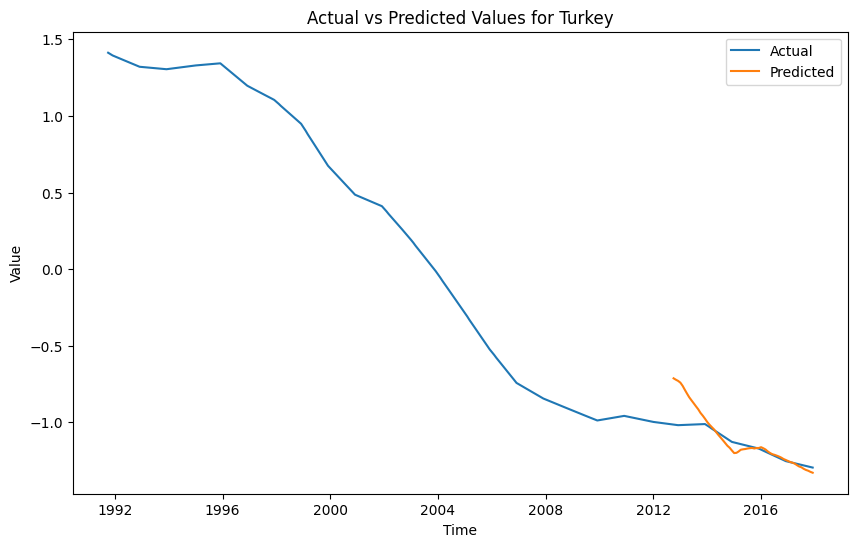

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(ChinaY.index, ChinaY, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Actual vs Predicted Values for {Country_Name}')
plt.show()

In [113]:
n_future_steps = 24

input_data = Indonesia.iloc[-1, 1:].values.tolist()

print(input_data)

[-0.7023788210253319, -0.6985976129086862, -0.6950802100094802, -0.6929258007337166, -0.6893644302982711, -0.6851875143554641, -0.6822856569636195, -0.6791639618905743, -0.6757784616000888, -0.6719093184109626]


In [114]:
future_predictions = []

for _ in range(n_future_steps):
    input_array = np.array(input_data).reshape(1, -1)

    next_value = mlp_regressor_Indonesia.predict(input_array)[0]

    future_predictions.append(next_value)

    input_data.append(next_value)
    input_data.pop(0)

In [115]:
future_predictions = pd.DataFrame(future_predictions)
future_predictions = future_predictions.reset_index()
future_predictions = future_predictions.rename(columns={future_predictions.columns[0]: 'Date'})
future_predictions = future_predictions.rename(columns={future_predictions.columns[1]: 'future_predictions'})

base_date = pd.Timestamp('2018-1-01')
future_predictions['Date'] = base_date + future_predictions.index.to_series().apply(lambda x: relativedelta(months=x))
future_predictions.set_index('Date', inplace=True)

future_predictions['future_predictions'] = ss.inverse_transform(future_predictions[['future_predictions']])
Indonesia['Indonesia'] = ss.inverse_transform(Indonesia[['Indonesia']])

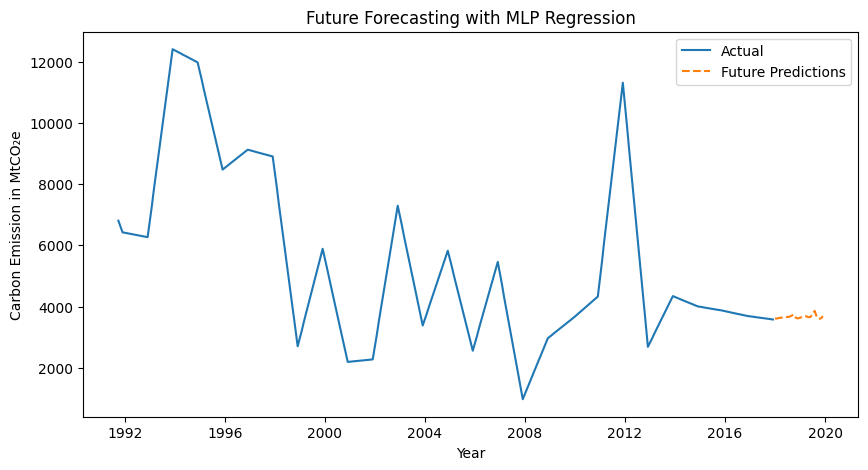

In [116]:
plt.figure(figsize=(10, 5))
plt.plot(Indonesia.index, Indonesia['Indonesia'], label='Actual')
plt.plot(future_predictions.index, future_predictions, label='Future Predictions', linestyle='--')
plt.title("Future Forecasting with MLP Regression")
plt.legend()
plt.ylabel('Carbon Emission in MtCO₂e')
plt.xlabel('Year')
plt.show()